# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [29]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y=np.array([[0,0,1,1]]).T
'''
輸出資料集進行初始化
.T” 為轉置函數。經轉置後，該  y  矩陣便包含 4 column 1 row。
同我們的輸入一致，每一 column 是一個訓練實例，而每一row（僅有一row）對應一個輸出節點。
因此，我們的網路含有 3 個輸入， 1 個輸出
'''

In [30]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
#np.random.random((3,4))，生成3x4 的陣列，陣列元素從0~1
#syn0權值的第一層，突觸0（Synapse0），連線l0與l1
syn0 = 2*np.random.random((3,4)) - 1  #隨機初始化權重
# define syn1
syn1 = 2*np.random.random((4,1)) - 1  #隨機初始化權重

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即'輸入層-第一層隱層'間權重矩陣）
#用 “syn1” 來代指 (即'輸入層-第二層隱層'間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]

In [31]:
syn0_history

[array([[-0.16595599,  0.44064899, -0.99977125],
        [-0.39533485, -0.70648822, -0.81532281],
        [-0.62747958, -0.30887855, -0.20646505]])]

In [32]:
syn1_history

[array([[ 0.07763347, -0.16161097,  0.370439  ],
        [-0.5910955 ,  0.75623487, -0.94522481],
        [ 0.34093502, -0.1653904 ,  0.11737966]])]

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [40]:
for iter in range(10000): #迭代次數
    # forward propagation (正向傳播)
    l0 = X #第一層節點，指定為輸入資料
    
    #神經網路的第二層，不然的話就是隱含層
    l1 = nonlin(np.dot(l0,syn0)) #nonlin:非線性、np.dot:矩陣互乘
    '''
    l1是輸出量 ,nonlin(np.dot(l0,syn0))是輸入量l0與權值syn0相乘作為輸出節點激勵函數的自變量
    '''
    #計算輸出節點的輸出值
    l2 = nonlin(np.dot(l1,syn1)) #nonlin:非線性、np.dot:矩陣互乘 
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l1_error = y - l1 # l1_error誤差，計算與實際值的誤差
    l2_error = y - l2 #l2_error誤差，計算與實際值的誤差
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    #反向傳播
    #利用梯度下降法，計算權重改變量，nonlin(l1,True)表示對輸出量求導數
    #利用梯度下降法，計算權重改變量，nonlin(l2,True)表示對輸出量求導數
    l1_delta = l1_error * nonlin(l1,True) #l1_delta 誤差校正係數
    l2_delta = l2_error * nonlin(l2,True) #l2_delta 誤差校正係數
    
    # update weights
    syn0 += np.dot(l0.T,l1_delta) #np.dot:矩陣互乘
     # syn1 update weights
    syn1 += np.dot(l1.T,l2_delta) #np.dot:矩陣互乘
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)


Output After Training:
[[0.00679809 0.00679826 0.00679946]
 [0.00553562 0.00553493 0.00553585]
 [0.99548584 0.99548654 0.99548579]
 [0.99445503 0.99445505 0.99445408]]



[[0.506032   0.50603182 0.50603194]
 [0.50491145 0.50491122 0.50491149]
 [0.97161784 0.97161785 0.97161784]
 [0.97151674 0.97151674 0.97151674]]


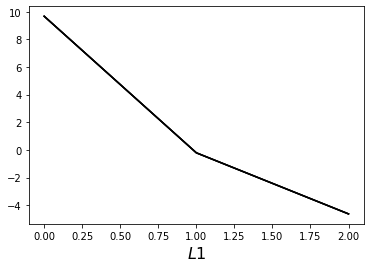

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

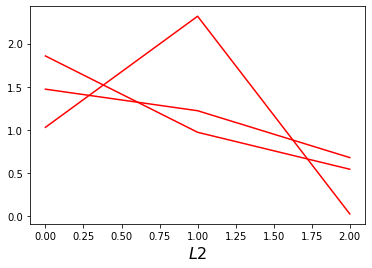

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果
plt.plot(syn1_history[0], ms=5, lw=1.5, color='red')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

參考來源:https://www.twblogs.net/a/5b7f1f122b717767c6ade146/zh-cn